DataFrame:
    PCA Components  Training Time (s)  Validation Accuracy
0              784             369.00               0.8334
1              784             383.30               0.8208
2              784             379.09               0.8191
3              784             331.32               0.8344
4              784             345.18               0.8180
5                5             137.02               0.7456
6                5             147.64               0.7318
7                5             146.46               0.7444
8                5             147.18               0.7335
9                5             149.42               0.7444
10              10             182.63               0.8230
11              10             188.63               0.8218
12              10             183.45               0.8240
13              10             181.31               0.7962
14              10             181.19               0.8238
15              50             210.27        

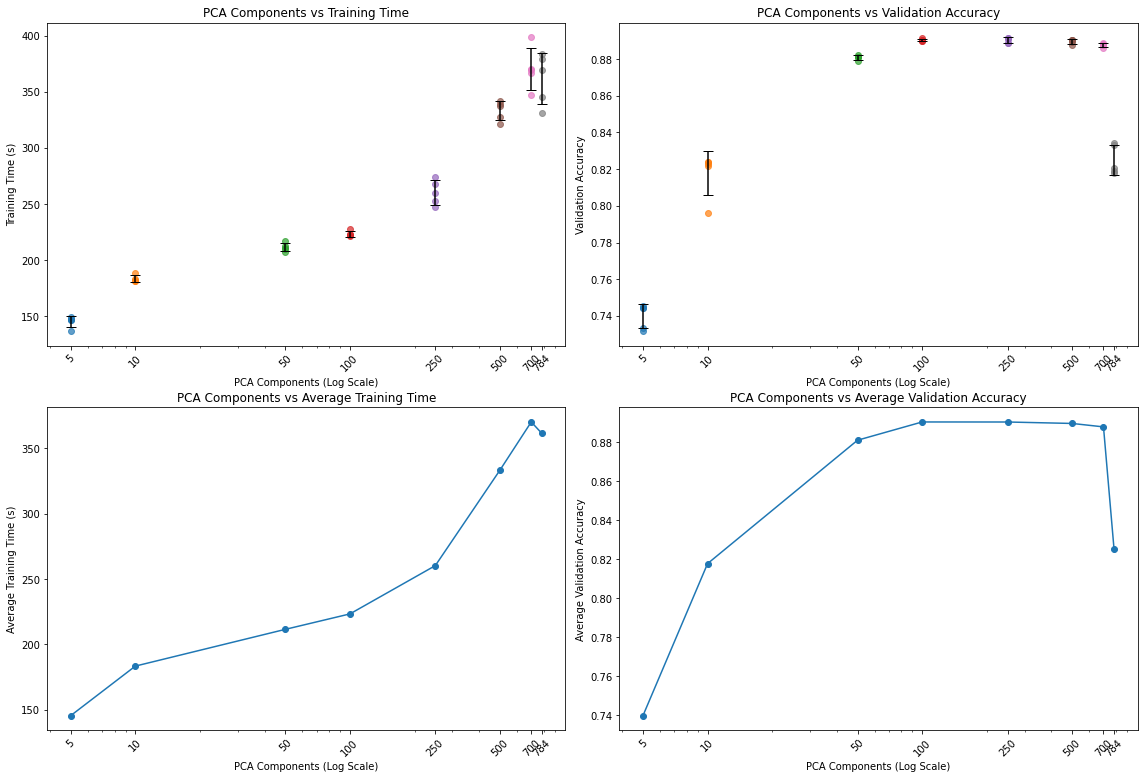

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取实验结果数据
with open('results.txt', 'r') as f:
    data = f.read()

# 将数据拆分为行
lines = data.split('\n')

# 初始化列表来存储数据
pca_components = []
training_time = []
val_accuracy = []

# 解析每一行数据
for line in lines:
    if 'PCA Components' in line:
        value = line.split(':')[-1].strip()
        if value != 'N/A':
            pca_components.append(int(value))
        else:
            pca_components.append(784)  # 如果未使用PCA,则使用原始图像尺寸(28x28=784)
        
    if 'Training finished in' in line:
        training_time.append(float(line.split('in')[-1].split('seconds')[0].strip()))
        
    if 'val_accuracy:' in line:
        val_accuracy.append(float(line.split('val_accuracy:')[-1].strip()))

# 创建DataFrame
df = pd.DataFrame({
    'PCA Components': pca_components,
    'Training Time (s)': training_time,
    'Validation Accuracy': val_accuracy
})

# 计算每个PCA Components的平均训练时间和验证准确率
df_mean = df.groupby('PCA Components').mean().reset_index()

print("DataFrame:")
print(df)

# 创建一个包含四个子图的图形
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 散点图:PCA Components vs Training Time
for pca, group in df.groupby('PCA Components'):
    ax1.scatter([pca] * len(group), group['Training Time (s)'], label=pca, alpha=0.7)
ax1.errorbar(df.groupby('PCA Components').mean().index, df.groupby('PCA Components').mean()['Training Time (s)'], 
             yerr=df.groupby('PCA Components').std()['Training Time (s)'], fmt='none', capsize=5, ecolor='black')
ax1.set_title('PCA Components vs Training Time')
ax1.set_xscale('log')
ax1.set_xticks(df['PCA Components'].unique())
ax1.set_xticklabels(df['PCA Components'].unique(), rotation=45)
ax1.set_xlabel('PCA Components (Log Scale)')
ax1.set_ylabel('Training Time (s)')

# 散点图:PCA Components vs Validation Accuracy
for pca, group in df.groupby('PCA Components'):
    ax2.scatter([pca] * len(group), group['Validation Accuracy'], label=pca, alpha=0.7)
ax2.errorbar(df.groupby('PCA Components').mean().index, df.groupby('PCA Components').mean()['Validation Accuracy'], 
             yerr=df.groupby('PCA Components').std()['Validation Accuracy'], fmt='none', capsize=5, ecolor='black')
ax2.set_title('PCA Components vs Validation Accuracy')
ax2.set_xscale('log')
ax2.set_xticks(df['PCA Components'].unique())
ax2.set_xticklabels(df['PCA Components'].unique(), rotation=45)
ax2.set_xlabel('PCA Components (Log Scale)')
ax2.set_ylabel('Validation Accuracy')

# 折线图:PCA Components vs Average Training Time
ax3.plot(df_mean['PCA Components'], df_mean['Training Time (s)'], marker='o')
ax3.set_title('PCA Components vs Average Training Time')
ax3.set_xscale('log')
ax3.set_xticks(df['PCA Components'].unique())
ax3.set_xticklabels(df['PCA Components'].unique(), rotation=45)
ax3.set_xlabel('PCA Components (Log Scale)')
ax3.set_ylabel('Average Training Time (s)')

# 折线图:PCA Components vs Average Validation Accuracy
ax4.plot(df_mean['PCA Components'], df_mean['Validation Accuracy'], marker='o')
ax4.set_title('PCA Components vs Average Validation Accuracy')
ax4.set_xscale('log')
ax4.set_xticks(df['PCA Components'].unique())
ax4.set_xticklabels(df['PCA Components'].unique(), rotation=45)
ax4.set_xlabel('PCA Components (Log Scale)')
ax4.set_ylabel('Average Validation Accuracy')

# 调整子图间距和布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

# 显示图形
plt.show()